<a href="https://colab.research.google.com/github/TanukiDong/Robo3/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your task is to predict whether the customer is going to default the loan or not.
You can study about the dataset using this kaggle link https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data.
You may see how others worked on this dataset but I encourage you to make your own code to practice on data analysis and machine learning development.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
df = pd.read_csv('./Loan_Default.csv')

Take a peek at the data

In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


# Data Exploration

In [ ]:
df.shape
#(148670, 34)

(148670, 34)

The size of the data is correct, no data is lost during loading data

Let's see the column name and their data types of this dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Ok we have some nulls. That's not good. But we'll deal with them later.

These are the numerical columns

In [ ]:
numerical_features = df._get_numeric_data().columns.tolist()
numerical_features

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

And these are the categorical columns

In [ ]:
categorical_features=list(set(df.columns.tolist())-set(numerical_features))
categorical_features

['approv_in_adv',
 'interest_only',
 'business_or_commercial',
 'co-applicant_credit_type',
 'Neg_ammortization',
 'occupancy_type',
 'Secured_by',
 'open_credit',
 'loan_type',
 'submission_of_application',
 'total_units',
 'Gender',
 'Credit_Worthiness',
 'credit_type',
 'loan_limit',
 'Security_Type',
 'age',
 'lump_sum_payment',
 'loan_purpose',
 'construction_type',
 'Region']

We need different method to deal with numerical nulls and categorical nulls

Let's see the distribution of data visually

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>],
       [<Axes: title={'center': 'Interest_rate_spread'}>,
        <Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'dtir1'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

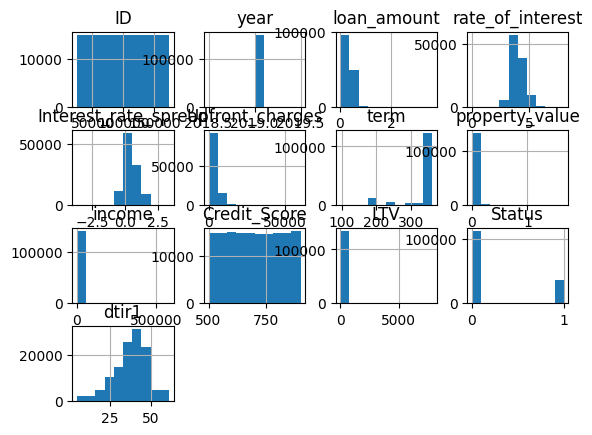

In [ ]:
df.hist()

Some columns (year, income, LTV) is shown as a single bar. It may suggest that they only hold one value. But let's check.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


The year column only contains one value. It would not contribrute to our prediction so it could be removed

In [ ]:
df.skew().sort_values()

<ipython-input-11-7aed40c2ebf0>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values()


term                     -2.174822
dtir1                    -0.551465
ID                        0.000000
year                      0.000000
Credit_Score              0.004767
Interest_rate_spread      0.280762
rate_of_interest          0.388406
Status                    1.176762
loan_amount               1.666998
Upfront_charges           1.754076
property_value            4.586276
income                   17.307695
LTV                     120.615337
dtype: float64

Some columns are skewed (I'm looking at you LTV). This means they have outliers that may affect the result of our model. We'll need to deal with it by normalizing them.

# Preprocess Data

Let's check the percentage of null values of each column

In [ ]:
df.isna().mean().sort_values(ascending=False) * 100

Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
Region                        0.000000
total_units                   0.000000
Security_Type                 0.000000
Status                        0.000000
co-applicant_credit_type      0.000000
Credit_Score                  0.000000
credit_type                   0.000000
ID                            0.000000
Secured_by                    0.000000
occupancy_type                0.000000
construction_type             0.000000
year                     

For columns that have less than 5% null values, we can drop the rows without any significant change to the result

In [ ]:
haveLittleNa = ['loan_limit','approv_in_adv','submission_of_application','age','loan_purpose','Neg_ammortization','term']
df.dropna(subset=haveLittleNa, inplace=True)
df.isna().mean().sort_values(ascending=False) * 100

Upfront_charges              26.612802
Interest_rate_spread         24.492504
rate_of_interest             24.492504
dtir1                        16.190549
LTV                          10.140890
property_value               10.140890
income                        6.137194
submission_of_application     0.000000
age                           0.000000
co-applicant_credit_type      0.000000
construction_type             0.000000
credit_type                   0.000000
Region                        0.000000
Security_Type                 0.000000
Status                        0.000000
total_units                   0.000000
Secured_by                    0.000000
occupancy_type                0.000000
Credit_Score                  0.000000
ID                            0.000000
year                          0.000000
interest_only                 0.000000
Neg_ammortization             0.000000
term                          0.000000
loan_amount                   0.000000
business_or_commercial   

Checking that the year column only have 1 value

In [ ]:
df['year'].value_counts()

2019    143942
Name: year, dtype: int64

Yep. 2019

Status is the value that we'll use the model to predict

In [ ]:
df['Status'].value_counts()

0    108687
1     35255
Name: Status, dtype: int64

We can see that the data is biased. 0 is triple the amount of 1.

It only have 2 value (0 and 1) so we'll use classification model for this problem

In [ ]:
x = df.drop(['ID','year','Status'], axis = 1)
y = df['Status'].copy()

The features that will be used to predict Status is assigned as x. ID and year is dropped since it is clearly not a factor for predicting status

Status is removed from x, and is assigned as y

Let's split the data into train and test data


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,stratify=y,random_state=555)

In [ ]:
x_train.isna().sum()

loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             24678
Interest_rate_spread         24678
Upfront_charges              26809
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               10138
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        6163
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
LTV                          10138
Region              

The null values that we haven't deal with, we'll deal with them now using Pipeline

In [ ]:
numericTransformer = Pipeline(steps = [('Imputer', SimpleImputer(strategy = 'median')),
                                       ('MinMaxScaler', MinMaxScaler()),
                                       ('PolynomialScaler', PolynomialFeatures(degree = 2, include_bias = False))])
catsTransformer = Pipeline(steps = [("Imputer", SimpleImputer(strategy="most_frequent")),
                                    ('OneHotEncoder', OneHotEncoder(drop = 'first'))])
preprocessor = ColumnTransformer(transformers = [('nums', numericTransformer, make_column_selector(dtype_include = np.number)),
                                                 ('cats', catsTransformer, make_column_selector(dtype_include = object))])

For numerical columns, null values are filled by the median value of its column, and the data is scaled to become a normal distribution to deal with outliers/skewed columns

For categorical columns, null values are filled with the most frequent value of its column, and onehotencoder is used to convert categorical to numerical data

In [ ]:
x_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(x_train))
x_test_preprocessed = pd.DataFrame(preprocessor.fit_transform(x_test))

Now the x_train and x_test is now processed

# Model

## Logistic Regression

First we'll try logistic regression

### Train

Fit the x_train and y_train to the model. [solver='lbfgs', max_iter=1000] is included because the default model is not large enough.




In [ ]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000) #solver='lbfgs', max_iter=1000
lr.fit(x_train_preprocessed,y_train)

LogisticRegression(max_iter=1000)

Let see how the model perform on the training data

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     76081
           1       0.93      0.55      0.69     24678

    accuracy                           0.88    100759
   macro avg       0.90      0.77      0.81    100759
weighted avg       0.89      0.88      0.87    100759

Accuracy on train:   0.88 



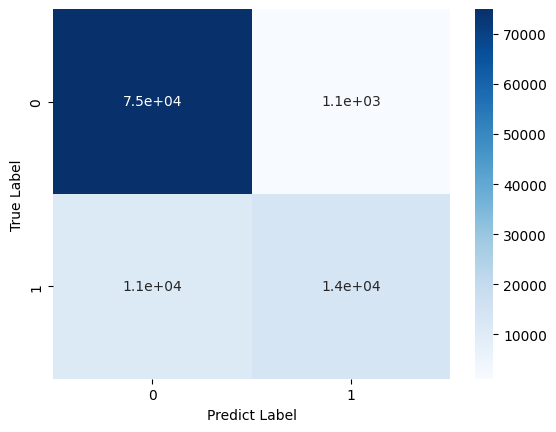

In [ ]:
y_train_pred=pd.DataFrame(lr.predict(x_train_preprocessed))

print("Classification Report: \n", metrics.classification_report(y_train, y_train_pred))
print("Accuracy on train:  ",lr.score(x_train_preprocessed,y_train).round(3),'\n')
cf=metrics.confusion_matrix(y_train,y_train_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

### Test

Now let's try it with test data

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     32606
           1       0.71      0.52      0.60     10577

    accuracy                           0.83     43183
   macro avg       0.78      0.72      0.75     43183
weighted avg       0.82      0.83      0.82     43183

Accuracy on test:   0.83 



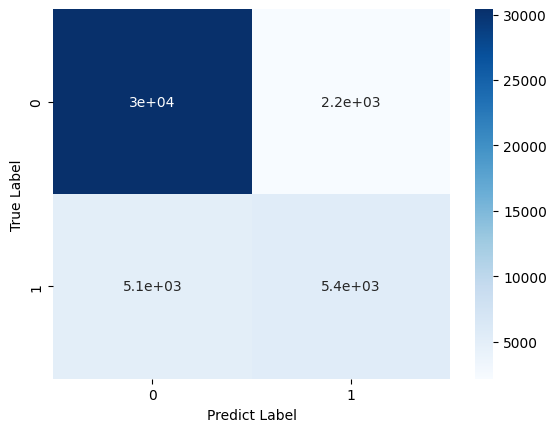

In [ ]:
y_test_pred=pd.DataFrame(lr.predict(x_test_preprocessed))

print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
print("Accuracy on test:  ",lr.score(x_test_preprocessed,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_test_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()


## K Nearest Neighbour

Now we're going to try the second model, KNN

After trying different k values, 10 performs alright compared to other k values

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_preprocessed, y_train)

KNeighborsClassifier(n_neighbors=10)

### Test

let's see how well it perform on test data

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     32606
           1       0.89      0.46      0.61     10577

    accuracy                           0.85     43183
   macro avg       0.87      0.72      0.76     43183
weighted avg       0.86      0.85      0.84     43183
 

Accuracy on train:   0.87 

Accuracy on test:  0.854 



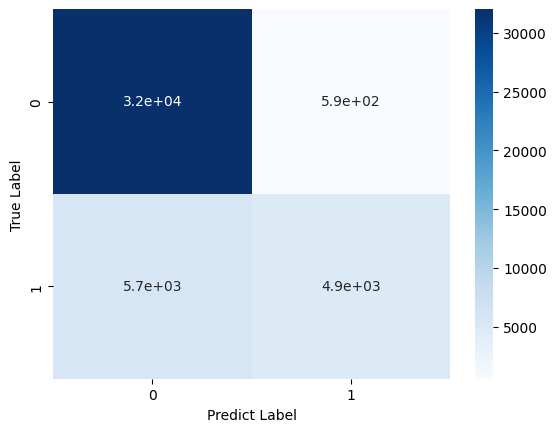

In [ ]:
y_pred = knn.predict(x_test_preprocessed)

print("Classification Report: \n", metrics.classification_report(y_test,y_pred),'\n')
print("Accuracy on train:  ",knn.score(x_train_preprocessed,y_train).round(3),'\n')
print("Accuracy on test: ",knn.score(x_test_preprocessed,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

After trying out Logistic Regression and K Nearest Neighbour, it is safe to say that KNN outperforms Logistic Regression. However, both model got the same problem.

1.   They predict a lots of false positives and false negatives
2.   They predict true negatives (0) better than true positives (1).

This is because, as noted before, 0 is three time more than 1 for this dataset.

For future works

1.   Use gridsearchCV to find the best parameters for KNN. Actually I already tried but the runtime takes too long so I search the k value manually instead.
2.   Find a way to remove the 0 1 bias for x.



